In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
T, T0, T1, s, theta, k, sigma, r0, t = symbols('T T_0 T_1 s theta kappa sigma r_0 t', positive = True)

In [3]:
forward = exp(-k*T)*(r0-theta)+theta-sigma**2/(2*k**2)*(1-exp(-k*T))**2
P0 = exp(-integrate(forward, (T, 0, T0)))
P1 = exp(-integrate(forward, (T, 0, T)))
K = simplify(P1/P0)

# Volatilities
v0 = -integrate(sigma*exp(-k*(T0-t)), (t, t, T0))
v1 = -integrate(sigma*exp(-k*(T-t)), (t, t, T))
v01 = integrate((v0-v1)**2, (t, 0, T0))

In [4]:
d1 = simplify((ln(P1/(K*P0)) + 1/2*v01)/sqrt(v01))
d2 = simplify((ln(P1/(K*P0)) - 1/2*v01)/sqrt(v01))

In [5]:
params = [(k, 1.52), (theta, 0.057), (sigma, 0.03), (r0, 0.06), (T0, 1/4), (T, 1/2)]

In [6]:
maturities = np.arange(0.25, 10.25, 0.25)
puts = []
put = simplify(K*P0*norm.cdf(float(-d2.subs(params)))-P1*norm.cdf(float(-d1.subs(params))))
for i in maturities:
    params = [(k, 1.52), (theta, 0.057), (sigma, 0.03), (r0, 0.06), (T0, i), (T, i+0.25)]
    put = simplify(K*P0*norm.cdf(float(-d2.subs(params)))-P1*norm.cdf(float(-d1.subs(params))))
    put_price = float(put.subs(params)*10000)
    puts.append(put_price)

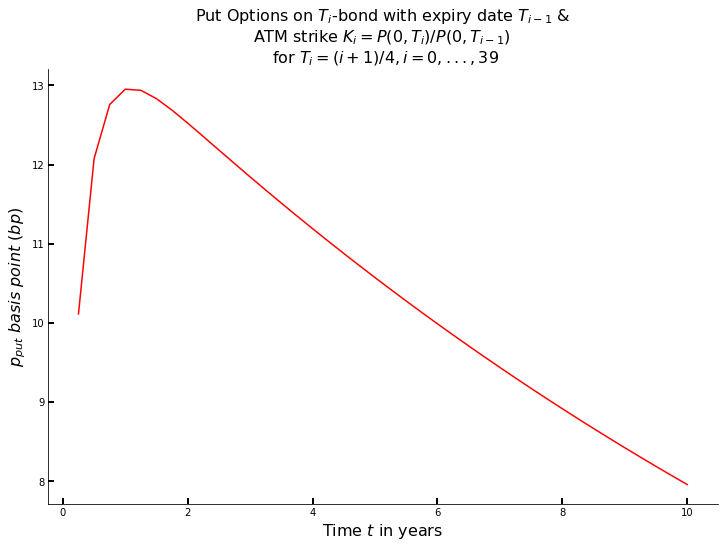

In [7]:
fig, ax = plt.subplots(figsize = [12, 8]);
plt.plot(maturities, puts, color = 'red')
plt.ylabel('$p_{put}~basis~point~(bp)$', fontsize = 16)
plt.xlabel('Time $t$ in years', fontsize = 16)
ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(direction = 'in', length=6, width=2, colors='k',
               grid_color='k', grid_alpha=.1)
plt.title('Put Options on $T_i$-bond with expiry date $T_{i-1}$ & \nATM strike $K_i=P(0,T_i)/P(0,T_{i-1})$ \n for $T_i=(i+1)/4, i=0,...,39$', fontsize = 16);